In [1]:
from dask.distributed import Client, LocalCluster
import bokeh
import geopandas as gpd
import scipy
import libpysal
import momepy
import json
from dask import delayed
import glob
import dask
import dask.dataframe as dd
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import json
from tqdm import tqdm
from shapely.geometry import Point
import networkx as nx
import pickle
import time

/tmp/ipykernel_4670/154743991.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
local_crs = 3414

place = "singapore"

latlng = (103.85, 1.29)

In [4]:
daskCluster = LocalCluster(threads_per_worker=1,
                n_workers=8, memory_limit='100GB')

client = Client(daskCluster)

client

2023-06-12 21:08:11,681 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 31.31 GiB
2023-06-12 21:08:11,684 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 31.31 GiB
2023-06-12 21:08:11,686 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 31.31 GiB
2023-06-12 21:08:11,689 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 31.31 GiB
2023-06-12 21:08:11,692 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 31.31 GiB
2023-06-12 21:08:11,694 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 31.31 GiB
2023-06-12 21:08:11,696 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 31.31 GiB
2023-06-12 21:08:11,

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 8,Total memory: 250.47 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39407,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 250.47 GiB
Comm: tcp://127.0.0.1:44523,Total threads: 1
Dashboard: http://127.0.0.1:46355/status,Memory: 31.31 GiB
Nanny: tcp://127.0.0.1:38761,


In [5]:
# with open('./out/{place}/what_cells_are_in_what_cluster_dict.json', 'r') as f:
#     includes_dict = json.load(f)
    
tessellation = gpd.read_parquet(f"./out/{place}/tessellation.pq")

buildings = gpd.read_parquet(f"./out/{place}/buildings.pq")

streets = gpd.read_parquet(f"./out/{place}/streets.pq").explode()

/tmp/ipykernel_4670/1367824222.py:8: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  streets = gpd.read_parquet(f"./out/{place}/streets.pq").explode()


In [6]:
tessellation.columns

Index(['uID', 'geometry'], dtype='object')

In [7]:
buildings.columns

Index(['uID', 'geometry'], dtype='object')

In [8]:
# # Map for comparison
# f, ax = plt.subplots(figsize=(200, 200))
# tessellation.plot(linewidth=0.8, ax=ax, edgecolor='0.8')
# streets.plot(ax=ax, color='blue')
# buildings.plot(ax=ax, color='black', alpha=0.5)
# ax.set_axis_off()

# # Show the plot
# plt.show()

In [9]:
tessellation = tessellation[["uID", "geometry"]]

In [10]:
buildings = buildings[["uID", "geometry"]]

In [11]:
streets['nID'] = momepy.unique_id(streets)
streets = streets.reset_index().drop(["level_0", "level_1"], axis=1)
# buildings['nID'] = momepy.get_network_id(buildings, streets,
#                                                'nID').values

# buildings = buildings.drop_duplicates("uID").drop(columns="index_right")
# tessellation = tessellation.merge(buildings[['uID', 'nID']], on='uID', how='left')

In [12]:
# @dask.delayed
# def queen_contiguity_load(n1, includes_dict):
#     chunk = gpd.read_parquet(f"./out/{place}/expanded_cells_in_chunk_{int(n1)}.pq")
    
#     # weights
    # queen_1 = libpysal.weights.w_subset(momepy.sw_high(k=1, gdf=chunk, ids='uID'), includes_dict[str(n1)]).to_adjlist()
    # queen_3 = libpysal.weights.w_subset(momepy.sw_high(k=3, gdf=chunk, ids='uID'), includes_dict[str(n1)]).to_adjlist()
    
#     return (queen_1, queen_3)

In [13]:
# file_pattern = f"./out/{place}/expanded_cells_in_chunk_*.pq"
# file_list = glob.glob(file_pattern)
# num_files = len(file_list)

# weight_out = [process(n1, includes_dict) for n1 in tqdm(range(num_files))]

# weight_out = [queen_contiguity_load(n1, includes_dict) for n1 in range(num_files)]

# weight_out = dask.compute(weight_out)


In [14]:
# queen_1 = libpysal.weights.W.from_adjlist(pd.concat(weight_out[0][i][0] for i in range(num_files)))

# queen_3 = libpysal.weights.W.from_adjlist(pd.concat(weight_out[0][i][1] for i in range(num_files)))

In [15]:
# latlng_series = gpd.GeoSeries([Point(latlng)], crs=4326)

In [16]:
# buildings["building_distance_to_central_city"] = buildings.geometry.centroid.distance(latlng_series.to_crs(local_crs)[0])

In [17]:
# # Find the uIDs in tessellation that are not in buildings
# tessellation_uids = set(tessellation['uID'])
# buildings_uids = set(buildings['uID'])
# new_uids = tessellation_uids - buildings_uids

# # Create a new GeoDataFrame with the new uIDs and empty geometry
# new_rows = pd.DataFrame({'uID': list(new_uids)})
# new_rows['geometry'] = None
# new_gdf = gpd.GeoDataFrame(new_rows, crs=buildings.crs)

# # Append the new GeoDataFrame to buildings
# new_buildings = pd.concat([buildings, new_gdf], ignore_index=True)

In [18]:
### Building Area
buildings['building_area'] = momepy.Area(buildings).series
tessellation['tess_area'] = momepy.Area(tessellation).series

In [19]:
continuity = momepy.COINS(streets)
# stroke_gdf = continuity.stroke_gdf()

streets["continuity_stroke"] = continuity.stroke_attribute()

In [20]:
queen_1 = libpysal.weights.fuzzy_contiguity(tessellation, tolerance=0.05, buffering=True, drop=True, buffer=5, ids="uID", silence_warnings=True)
queen_3 = momepy.sw_high(k=3, weights=queen_1)
dist200 = libpysal.weights.DistanceBand.from_dataframe(buildings, 200, ids='uID')

/home/virgilxw/miniconda3/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 1939 disconnected components.
 There are 576 islands with ids: 28, 501, 502, 508, 535, 1788, 1948, 2189, 2860, 5055, 5645, 5656, 5662, 5702, 5707, 8133, 9193, 9201, 10638, 10776, 13292, 13653, 13654, 16954, 17555, 17857, 19135, 19142, 19235, 19241, 19318, 19358, 20781, 20894, 21202, 21392, 21399, 21452, 21512, 21513, 21545, 21572, 21616, 21827, 21836, 21844, 21924, 22041, 22042, 22043, 22049, 22176, 22177, 22178, 22181, 22689, 22714, 22795, 22807, 23195, 23733, 23735, 23782, 23922, 24076, 24095, 24502, 24504, 24563, 24625, 24644, 24980, 25074, 25089, 25148, 25563, 25612, 25752, 25753, 25762, 25768, 25792, 25813, 25814, 25833, 25843, 26616, 26617, 27529, 27661, 27922, 27963, 27964, 28095, 28105, 28767, 29659, 29990, 29991, 30364, 30422, 30491, 30597, 30598, 30599, 30971, 31453, 31560, 31561, 31664, 31816, 31817, 31901, 31946, 32211, 

In [21]:
buildings['building_circular_compactness'] = momepy.CircularCompactness(buildings).series
buildings['building_elongation'] = momepy.Elongation(buildings).series
buildings['building_squareness'] = momepy.Squareness(buildings).series
buildings['building_eri'] = momepy.EquivalentRectangularIndex(buildings).series
buildings['building_orientation'] = momepy.Orientation(buildings).series
streets['street_linearity'] = momepy.Linearity(streets).series
tessellation["tess_convexity"] = momepy.Convexity(tessellation).series
tessellation["tess_neighbours"] = momepy.Neighbors(tessellation, queen_3,'uID', weighted=True).series
tessellation["tess_neighbours_200"] =  momepy.Neighbors(tessellation, dist200, 'uID', weighted=True).series
tessellation["tess_covered_area"] = momepy.CoveredArea(tessellation, queen_1, "uID").series
tessellation["tess_area_iqr"] = momepy.Range(tessellation, values='tess_area', spatial_weights=queen_3, unique_id='uID', rng=(25, 75)).series
tessellation["tess_rea_theil"] = momepy.Theil(tessellation, values='tess_area', spatial_weights=queen_3, unique_id='uID').series
tessellation["tess_orientation"] = momepy.Orientation(tessellation).series
tessellation["building_neighbour_dist"] = momepy.NeighborDistance(buildings, queen_1, 'uID').series
tessellation["building_neighbourhood_interbuilding_distance"] = momepy.MeanInterbuildingDistance(buildings, queen_1, 'uID', 3).series

  0%|          | 0/227364 [00:00<?, ?it/s]

/home/virgilxw/miniconda3/lib/python3.10/site-packages/momepy/shape.py:962: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom.type == "Polygon":
/home/virgilxw/miniconda3/lib/python3.10/site-packages/momepy/shape.py:956: RuntimeWarning: invalid value encountered in arccos
  angle = np.degrees(np.arccos(cosine_angle))


  0%|          | 0/227364 [00:00<?, ?it/s]

/home/virgilxw/miniconda3/lib/python3.10/site-packages/momepy/distribution.py:74: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom.type in ["Polygon", "MultiPolygon", "LinearRing"]:
/home/virgilxw/miniconda3/lib/python3.10/site-packages/momepy/shape.py:1286: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom.type == "LineString"


  0%|          | 0/227364 [00:00<?, ?it/s]

  0%|          | 0/227364 [00:00<?, ?it/s]

  0%|          | 0/227364 [00:00<?, ?it/s]

  0%|          | 0/227364 [00:00<?, ?it/s]

  0%|          | 0/227364 [00:00<?, ?it/s]

  0%|          | 0/227364 [00:00<?, ?it/s]

/home/virgilxw/miniconda3/lib/python3.10/site-packages/momepy/distribution.py:74: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom.type in ["Polygon", "MultiPolygon", "LinearRing"]:


  0%|          | 0/227364 [00:00<?, ?it/s]

Computing mean interbuilding distances...


  0%|          | 0/227364 [00:00<?, ?it/s]

In [22]:
# StreetProfile computation
profile = momepy.StreetProfile(streets, buildings)


In [23]:
streets["street_width"] = profile.w
streets["street_width_deviation"] = profile.wd
streets["street_openness"] = profile.o

In [24]:
buildings['building_weighted_circom'] = momepy.WeightedCharacter(
buildings, buildings["building_circular_compactness"], queen_3, 'uID', momepy.Area(buildings).series).series

  0%|          | 0/227364 [00:00<?, ?it/s]

In [25]:
# primal = momepy.gdf_to_nx(streets, approach='primal')

In [26]:
%%time
# momepy.node_degree(primal)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


In [27]:
%%time
# primal = momepy.closeness_centrality(primal, radius=400, name='closeness400', distance='mm_len', weight='mm_len')

CPU times: user 0 ns, sys: 2 µs, total: 2 µs
Wall time: 4.05 µs


In [28]:
%%time
# primal = momepy.meshedness(primal, radius=400, distance="mm_len")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


In [29]:
# %%time
# primal = momepy.straightness_centrality(primal)

In [30]:
# %%time
# primal = momepy.closeness_centrality(primal, name='closeness_global', weight='mm_len')

In [31]:
# %%time
# primal =  momepy.betweenness_centrality(primal, name='betweenness_metric_n', mode='nodes', weight='mm_len', k=100)

In [32]:
# %%time
# primal = momepy.straightness_centrality(primal)
# # momepy.mean_nodes(primal, 'straightness')
# momepy.mean_nodes(primal, 'closeness400')
# # momepy.mean_nodes(primal, 'closeness_global')
# # momepy.mean_nodes(primal, 'betweenness_metric_n')

# nodes, streets = momepy.nx_to_gdf(primal)

In [33]:
cols = list(streets.columns)
cols.remove('geometry')

In [34]:
streets_dropped = streets.drop(cols,axis=1).reset_index(drop=True)

In [35]:
buildings = buildings.set_crs(local_crs)

In [36]:
# buildings=buildings.drop(["index_right"], axis=1)

In [37]:
buildings.columns

Index(['uID', 'geometry', 'building_area', 'building_circular_compactness',
       'building_elongation', 'building_squareness', 'building_eri',
       'building_orientation', 'building_weighted_circom'],
      dtype='object')

In [38]:
buildings = gpd.sjoin_nearest(left_df=buildings, right_df=streets_dropped, how='left', max_distance=1000).drop_duplicates(subset=['geometry'])
duplicates = buildings[buildings.duplicated(['uID'], keep=False)]
if len(duplicates) > 0:
    print(f"There are {len(duplicates)} rows with duplicate uids.")
    print(duplicates)
else:
    print("There are no rows with duplicate uids.")


There are no rows with duplicate uids.


In [39]:
buildings = buildings.dropna(subset=['geometry'])
tessellation = tessellation.dropna(subset=['geometry'])

In [40]:
streets.reset_index(drop=True, inplace=True)

In [41]:
streets["nID"]= streets.index

In [42]:
buildings.drop(columns=['index_right'], inplace=True)

In [43]:
streets["nID"]= streets.index
buildings =  gpd.sjoin_nearest(buildings, streets, how="left", max_distance=1000)

In [44]:
buildings["building_str_align"] = momepy.StreetAlignment(buildings, streets,
                                   'building_orientation', 'nID',
                                   'nID').series

/home/virgilxw/miniconda3/lib/python3.10/site-packages/momepy/distribution.py:84: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif geom.type in ["LineString", "MultiLineString"]:


In [45]:
buildings["building_str_align"]

0         22.042835
0          7.114630
1         24.190966
1          4.966499
2         36.887659
            ...    
227359    26.220792
227360    27.729728
227361    30.450673
227362     2.773757
227363     0.689828
Name: building_str_align, Length: 247605, dtype: float64

In [46]:
blg_cell_align = momepy.CellAlignment(buildings, tessellation,
                                      'building_orientation', 'tess_orientation',
                                      'uID', 'uID')
buildings['building_cell_align'] = blg_cell_align.series

In [47]:
buildings['building_cell_align']

0         19.890222
0         19.890222
1         25.848451
1         25.848451
2         18.477654
            ...    
227359     8.595352
227360    29.870404
227361     4.519630
227362    14.137398
227363    21.842173
Name: building_cell_align, Length: 247605, dtype: float64

In [48]:
tessellation['tess_car'] = momepy.AreaRatio(tessellation, buildings, 'tess_area', 'building_area', 'uID').series

In [49]:
nodes = gpd.read_parquet(f"./out/{place}/vertices_frame.pq")
edges = gpd.read_parquet(f"./out/{place}/edges_frame.pq")
dual = gpd.read_parquet(f"./out/{place}/dual_vertices_frame.pq")

In [50]:
buildings = buildings.drop(["nID", "index_right", "nID"], axis=1)
nodes = nodes.drop(["vertID"], axis=1)
edges = edges.drop("edgeID", axis=1)

In [51]:
buildings = gpd.sjoin_nearest(left_df=buildings, right_df=nodes, how='left', max_distance=1000).drop_duplicates(subset=['geometry'])
duplicates = buildings[buildings.duplicated(['uID'], keep=False)]
if len(duplicates) > 0:
    print(f"There are {len(duplicates)} rows with duplicate uids.")
    print(duplicates)
else:
    print("There are no rows with duplicate uids.")


There are no rows with duplicate uids.


In [52]:
buildings = buildings.drop("index_right", axis=1)
buildings = gpd.sjoin_nearest(left_df=buildings, right_df=edges, how='left', max_distance=1000).drop_duplicates(subset=['geometry'])
duplicates = buildings[buildings.duplicated(['uID'], keep=False)]
if len(duplicates) > 0:
    print(f"There are {len(duplicates)} rows with duplicate uids.")
    print(duplicates)
else:
    print("There are no rows with duplicate uids.")


There are no rows with duplicate uids.


In [53]:
buildings = buildings.drop("index_right", axis=1)
buildings = gpd.sjoin_nearest(left_df=buildings, right_df=dual, how='left', max_distance=1000).drop_duplicates(subset=['geometry'])
duplicates = buildings[buildings.duplicated(['uID'], keep=False)]
if len(duplicates) > 0:
    print(f"There are {len(duplicates)} rows with duplicate uids.")
    print(duplicates)
else:
    print("There are no rows with duplicate uids.")


There are no rows with duplicate uids.


In [54]:
tessellation = tessellation.merge(buildings, how='left', left_on = "uID", right_on="uID" )

In [55]:
tessellation = tessellation.drop(["geometry_y", "index_right"], axis=1)
tessellation = tessellation.rename(columns={"geometry_x": "geometry"})
tessellation = gpd.GeoDataFrame(tessellation.dropna(subset=['geometry']))

In [56]:
with open(f"./out/{place}/weights.pickle", 'wb') as f:
    pickle.dump(queen_1, f)
    pickle.dump(queen_3, f)
    pickle.dump(dist200, f)
    f.close()

In [57]:
tessellation.columns=tessellation.columns.astype(str)

In [58]:
tessellation

,uID,geometry,tess_area,tess_convexity,tess_neighbours,tess_neighbours_200,tess_covered_area,tess_area_iqr,tess_rea_theil,tess_orientation,...,closeness,global_closeness_centrality,global_clustering_400m,eigenvector,node_centrality_400m,node_meshedness_400m,betweeness_centrality_edge,dual_global_closeness_centrality,dual_global_angular_betweeness,dual_local_angular_closeness
0,0,"POLYGON ((1400616.533 4972737.288, 1400525.996...",136749.119016,0.997752,0.071830,0.005177,422398.715896,17261.794696,0.998689,31.400542,...,0.101518,0.000034,0.100000,95849.0,19.0,0.085714,0.000037,0.000450,0.000232,0.500000
1,1,"POLYGON ((1400917.915 4973182.230, 1400917.485...",17210.981777,0.975233,0.097511,0.013450,215861.503546,34113.505629,0.823051,35.210640,...,0.101518,0.000034,0.100000,95849.0,19.0,0.085714,0.000037,0.000450,0.000232,0.500000
2,2,"POLYGON ((1400742.906 4973648.851, 1400742.538...",6320.734947,0.950241,0.167899,0.061484,91544.517624,23070.754633,1.059120,24.742012,...,0.127758,0.000034,0.000000,88759.0,9.0,0.000000,0.000197,0.000478,0.000410,0.500000
3,3,"POLYGON ((1400728.379 4973717.979, 1400728.029...",912.566985,0.840390,0.426767,0.224234,78144.108710,26702.734197,1.050709,14.097888,...,0.000000,0.000035,0.000000,18703.0,3.0,0.000000,0.000197,0.000478,0.000410,0.500000
4,4,"POLYGON ((1401244.156 4973084.835, 1401244.426...",4168.070217,0.996454,0.089570,0.019194,154705.660138,51670.774742,0.839969,2.233811,...,0.101518,0.000034,0.100000,95849.0,19.0,0.085714,0.000037,0.000450,0.000232,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227359,227359,"POLYGON ((1402878.578 5013534.417, 1402878.327...",5121.416289,0.906032,0.141486,0.040425,25989.267403,1825.758685,0.289019,13.639079,...,0.000000,0.000029,0.083333,126011.0,26.0,0.040816,0.000989,0.000616,0.001090,0.333333
227360,227360,"POLYGON ((1402700.123 5013544.269, 1402700.432...",4066.030622,0.905363,0.081193,0.038832,21455.243599,2468.355493,0.265126,33.405195,...,0.000000,0.000029,0.083333,126011.0,26.0,0.040816,0.000989,0.000616,0.001090,0.333333
227361,227361,"POLYGON ((1402906.563 5013603.757, 1402905.617...",1636.690767,0.946027,0.169054,0.068874,8493.167555,2213.880196,0.313953,5.333477,...,0.000000,0.000029,0.083333,126011.0,26.0,0.040816,0.000989,0.000616,0.001090,0.333333
227362,227362,"POLYGON ((1402734.802 5013612.807, 1402734.686...",1790.537362,0.956664,0.107302,0.065573,10045.560816,2541.380709,0.253389,14.353364,...,0.000000,0.000029,0.083333,126011.0,26.0,0.040816,0.000989,0.000616,0.001090,0.333333


In [59]:
tessellation.describe()

,uID,tess_area,tess_convexity,tess_neighbours,tess_neighbours_200,tess_covered_area,tess_area_iqr,tess_rea_theil,tess_orientation,building_neighbour_dist,...,closeness,global_closeness_centrality,global_clustering_400m,eigenvector,node_centrality_400m,node_meshedness_400m,betweeness_centrality_edge,dual_global_closeness_centrality,dual_global_angular_betweeness,dual_local_angular_closeness
count,227364.000000,2.273640e+05,227364.000000,227364.000000,227364.000000,2.273640e+05,2.273640e+05,227364.000000,227364.000000,227355.000000,...,225144.000000,225144.000000,224751.000000,225144.000000,225144.000000,225144.000000,225145.000000,225145.000000,225145.000000,2.251450e+05
mean,113681.500000,7.268414e+03,0.931599,0.369194,0.421145,6.812367e+04,8.735412e+03,0.703965,21.148613,840.041176,...,0.026563,0.000045,0.029988,82434.239469,54.633763,0.038088,0.002514,0.000510,0.001676,inf
std,65634.477639,3.224478e+04,0.076603,0.266403,0.496367,1.918101e+05,1.703136e+04,0.384016,12.966418,1194.965233,...,0.050859,0.000009,0.053986,47167.923632,35.163355,0.049341,0.007659,0.000132,0.007733,NaN
min,0.000000,2.142714e+00,0.041493,0.000000,0.000000,6.811318e+02,0.000000e+00,0.000000,0.000066,0.000000,...,0.000000,0.000025,0.000000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.111111e-01
25%,56840.750000,6.720842e+02,0.909484,0.186258,0.107012,1.085425e+04,1.483329e+03,0.428434,9.808749,209.218398,...,0.000000,0.000037,0.000000,42730.000000,27.000000,0.000000,0.000014,0.000413,0.000010,3.333333e-01
50%,113681.500000,1.495396e+03,0.955173,0.316162,0.261405,2.186303e+04,3.354528e+03,0.620288,20.572789,441.803763,...,0.018844,0.000044,0.000000,82431.500000,48.000000,0.020101,0.000109,0.000516,0.000067,5.000000e-01
75%,170522.250000,4.242576e+03,0.981646,0.475221,0.557136,5.566613e+04,8.831925e+03,0.900362,32.011027,993.406296,...,0.033219,0.000052,0.043478,122734.000000,76.000000,0.061674,0.000892,0.000612,0.000405,5.000000e-01
max,227363.000000,3.430259e+06,1.000000,6.724994,12.549223,1.833719e+07,1.172789e+06,3.676952,44.999580,30043.315717,...,2.617119,0.000064,1.000000,180352.000000,291.000000,1.000000,0.127262,0.000815,0.236383,inf


In [60]:
tessellation.to_parquet(f"./out/{place}/tessellation_stats_no_percentile.pq")

In [61]:
# def split_dataframe(df, num_dfs):
#     """
#     This function splits a DataFrame into a list of smaller DataFrames with equal number of columns.

#     Parameters:
#     df (pandas.DataFrame): The DataFrame to split.
#     num_dfs (int): The number of DataFrames to split 'df' into.

#     Returns:
#     list: A list of pandas DataFrame objects.
#     """

#     dfs = []
#     n = df.shape[1]
#     num_cols = n // num_dfs

#     for i in range(num_dfs):
#         start = i * num_cols
#         end = (i + 1) * num_cols if i != num_dfs - 1 else n
#         dfs.append(df.iloc[:, start:end])

#     return dfs

# # Use the function
# list_of_dfs = split_dataframe(tessellation[tessellation.columns.drop(["uID", "geometry"])], 16)

In [62]:
dropped = tessellation.drop(["uID", "geometry"], axis=1)

column_lists = [list(dropped.columns[i:i + 16]) 
                for i in range(0, len(dropped.columns), 16)]



In [63]:
# def process_percentiles(tessellation, queen_3):
#     percentiles = []
#     for column in tessellation.columns.drop(["uID", "geometry"]):
#         perc = momepy.Percentiles(tessellation, column, queen_3, "uID", verbose=False).frame
#         perc.columns = [f"{column}_" + str(x) for x in perc.columns]
#         percentiles.append(perc)
        
#     percentiles_joined = pd.concat(percentiles, axis=1)
#     return percentiles_joined

In [64]:
def process_percentiles(df, column, queen_3):
    perc = momepy.Percentiles(df, column, queen_3, "uID", verbose=False).frame
    perc.columns = [f"{column}_" + str(x) for x in perc.columns]
    
    return perc

In [65]:
tessellation.columns

Index(['uID', 'geometry', 'tess_area', 'tess_convexity', 'tess_neighbours',
       'tess_neighbours_200', 'tess_covered_area', 'tess_area_iqr',
       'tess_rea_theil', 'tess_orientation', 'building_neighbour_dist',
       'building_neighbourhood_interbuilding_distance', 'tess_car',
       'building_area', 'building_circular_compactness', 'building_elongation',
       'building_squareness', 'building_eri', 'building_orientation',
       'building_weighted_circom', 'continuity_stroke', 'street_linearity',
       'street_width', 'street_width_deviation', 'street_openness',
       'building_str_align', 'building_cell_align',
       'betweeness_centrality_vertex', 'node_degree', 'closeness',
       'global_closeness_centrality', 'global_clustering_400m', 'eigenvector',
       'node_centrality_400m', 'node_meshedness_400m',
       'betweeness_centrality_edge', 'dual_global_closeness_centrality',
       'dual_global_angular_betweeness', 'dual_local_angular_closeness'],
      dtype='object')

In [68]:
queen_3_future = client.scatter(queen_3)

In [69]:
listofdf = []
for column_list in column_lists:
    computations = []

    for column in column_list:
        computations.append(delayed(process_percentiles)(tessellation[['uID', column]], column, queen_3_future))
        
    out = client.compute(computations)
    
    
    {listofdf.append(out[i].result()) for i in range(len(column_list))}

In [70]:
percentiles_joined = pd.concat(listofdf, axis=1)

In [71]:
merged_df = pd.concat([percentiles_joined, tessellation[['uID', 'geometry']]], axis=1)

In [72]:
percentiles_joined["uID"] = tessellation["uID"]
percentiles_joined["geometry"] = tessellation["geometry"]

In [73]:
gdf = gpd.GeoDataFrame(percentiles_joined, geometry="geometry")

<Axes: >

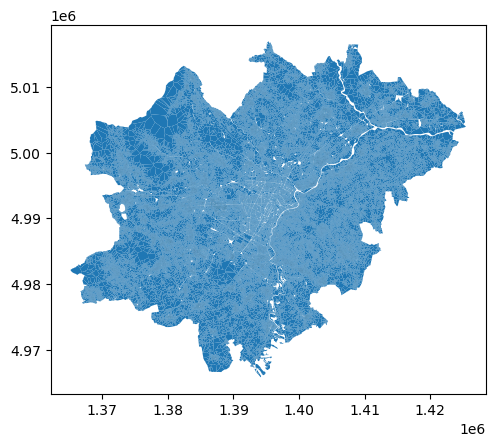

In [74]:
gdf.plot()

In [75]:
gdf.to_parquet(f"./out/{place}/tessellation_stats.pq")

In [76]:
# chunk_size = 250000
# chunks = []
# for i in range(0, len(tessellation), chunk_size):
#     chunks.append(tessellation.iloc[i:i + chunk_size])

In [77]:
# import os
# new_directory = f"./out/{place}/tessellation/"

# if not os.path.exists(new_directory):
#     os.makedirs(new_directory)
#     print(f"Created directory: {new_directory}")
# else:
#     print(f"Directory already exists: {new_directory}")

# # iterate over all files in the directory and delete them
# for filename in os.listdir(new_directory):
#     file_path = os.path.join(new_directory, filename)
#     if os.path.isfile(file_path):
#         os.remove(file_path)
#         print(f"Deleted file: {file_path}")

In [78]:
# for i, chunk in enumerate(chunks):
#     chunk.to_parquet(f"./out/{place}/tessellation/tesselation_chunk_{i}.pq")

In [79]:
# duplicates = tessellation[tessellation.duplicated(['uID'], keep=False)]
# if len(duplicates) > 0:
#     print(f"There are {len(duplicates)} rows with duplicate uids.")
#     print(duplicates)
# else:
#     print("There are no rows with duplicate uids.")

In [80]:
# import pickle

# # Open the file for reading
# with open('./out/{place}/weights.pickle', 'rb') as f:
#     # Load the variables in the same order that they were dumped
#     queen_1 = pickle.load(f)
#     queen_3 = pickle.load(f)
#     dist200 = pickle.load(f)
#     tessellation = pickle.load(f)

In [81]:
# tessellation.to_parquet("./out/{place}/tessellation_with_data.pq", write_metadata_file=False)

In [82]:
daskCluster.close()
client.shutdown()
